In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("*.cali"))

(1/2) Reading Files: 100%|██████████| 1/1 [00:00<00:00, 29.80it/s]
0it [00:00, ?it/s]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/thicket/ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


View Calltree

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

44.075 MPI_Comm_dup
0.000 MPI_Finalize
0.000 MPI_Finalized
0.000 MPI_Initialized
0.002 correctness_check
27.651 main
├─ 0.268 comm
│  └─ 0.268 comm_large
│     ├─ 0.264 MPI_Gather
│     └─ 0.004 MPI_Scatter
└─ 27.382 comp
   └─ 27.382 comp
      └─ 27.381 comp
         └─ 27.379 comp
            └─ 27.376 comp
               └─ 27.373 comp
                  └─ 27.367 comp
                     └─ 27.360 comp
                        └─ 27.347 comp
                           └─ 27.326 comp
                              └─ 27.287 comp
                                 └─ 27.209 comp
                                    └─ 27.049 comp
                                       └─ 26.714 comp
                                          └─ 26.007 comp
                                             └─ 24.509 comp
      

Group Performance data by `matrix_size` in the Thicket metadata table.

In [90]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("matrix_size")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "matrix_size"]).sort_index()

tk.dataframe.head()

profile  nid  \
node                                 num_procs matrix_size                    
{'name': 'main', 'type': 'function'} 2         128          2610149892  1.0   
                                               1024         3437593927  1.0   
                                               8192         3215678491  1.0   
                                     4         128          3753258889  1.0   
                                               1024          443040045  1.0   

                                                             spot.channel  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128          regionprofile   
                                               1024         regionprofile   
                                               8192         regionprofile   
                                     4         128          regionprofile   
                                               1024         regionprofile   

                                                            Min time/rank  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128               1.525967   
                                               1024             11.615283   
                                               8192          15619.577535   
                                     4         128               0.680535   
                                               1024              8.338628   

                                                            Max time/rank  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128               1.526105   
                                               1024             11.618756   
                                               8192          15619.658464   
                                     4         128               0.694164   
                                               1024              8.519993   

                                                            Avg time/rank  \
node                                 num_procs matrix_size                  
{'name': 'main', 'type': 'function'} 2         128               1.526036   
                                               1024             11.617019   
                                               8192          15619.618000   
                                     4         128               0.687047   
                                               1024              8.430501   

                                                              Total time  \
node                                 num_procs matrix_size                 
{'name': 'main', 'type': 'function'} 2         128              3.052072   
                                               1024            23.234039   
                                               8192         31239.236000   
                                     4         128              2.748187   
                                               1024            33.722003   

                                                            Min time/rank (exc)  \
node                                 num_procs matrix_size                        
{'name': 'main', 'type': 'function'} 2         128                     1.507982   
                                               1024                    0.368323   
                                               8192                    0.559222   
                                     4         128                     0.654633   
                                               1024                    1.354771   

                                                            Max time/rank (exc)  \
node                                 num_procs matrix_size                        
{'name': 'main', 'type': 'function'} 2         128                  

In [91]:
# Define common variables
processes = [2, 4, 8, 16, 32, 64]
matrix_sizes = [128, 1024, 8192]
avg_time = tk.dataframe.loc[node, "Avg time/rank"].unstack(level="matrix_size")
min_time = tk.dataframe.loc[node, "Min time/rank"].unstack(level="matrix_size")
max_time = tk.dataframe.loc[node, "Max time/rank"].unstack(level="matrix_size")


In [92]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [93]:
def plot_times_pandas(p1, p2, p3, title, xlabel, ylabel):
    plt.figure(figsize=(15, 7))

    # Plot the columns from the DataFrame
    plt.plot(p1, label='Minimum Time', color='green', linestyle='--', marker='x')
    plt.plot(p2, label='Maximum Time', color='red', linestyle='-.', marker='s')
    plt.plot(p3, label='Average Time', color='blue', linestyle='-', marker='o')

    # Add titles and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Add legend to differentiate between the lines
    plt.legend()

    # Show grid and plot
    plt.grid(True)
    plt.show()

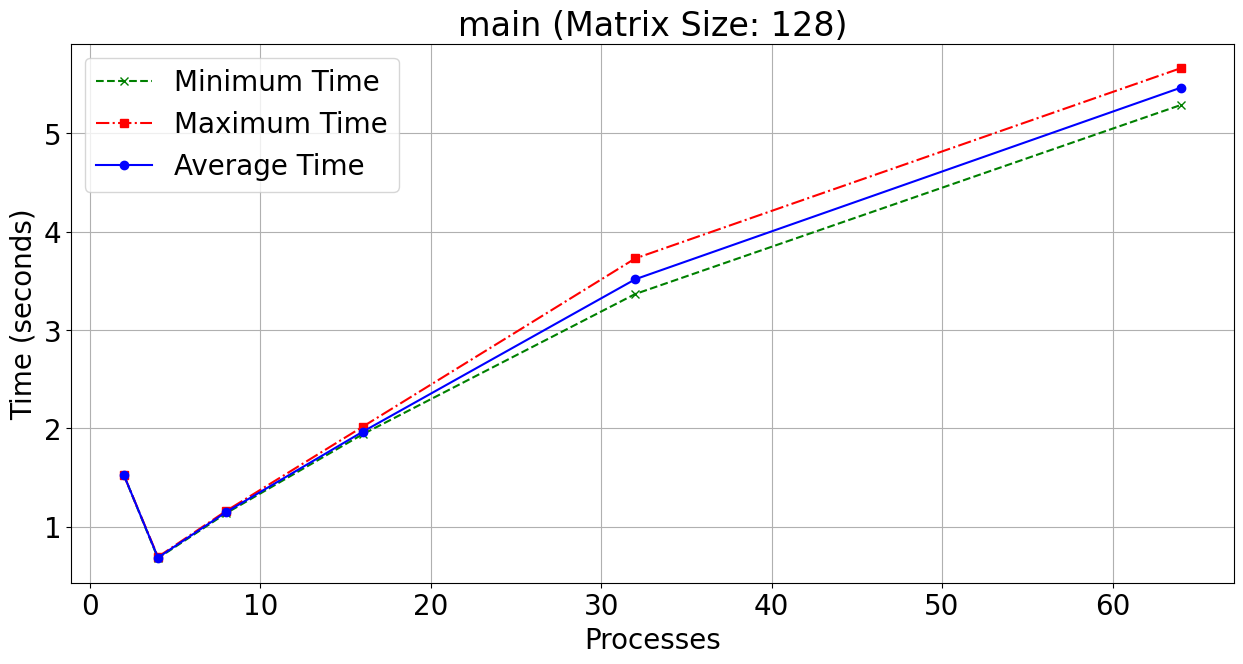

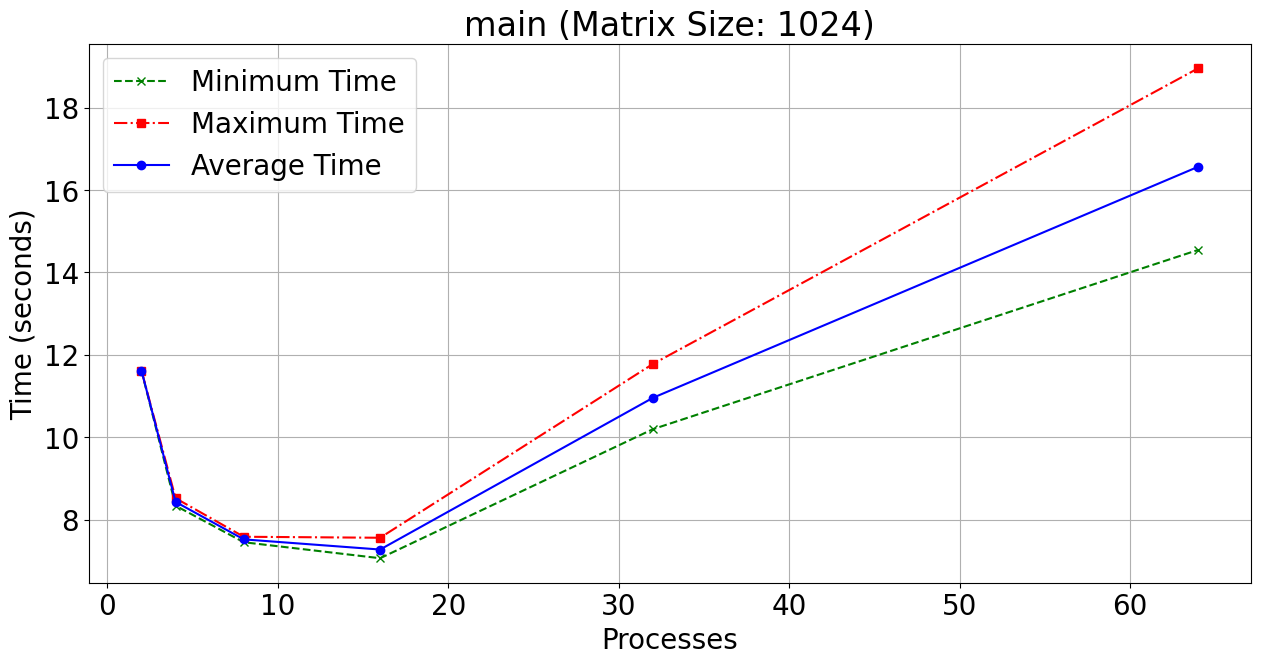

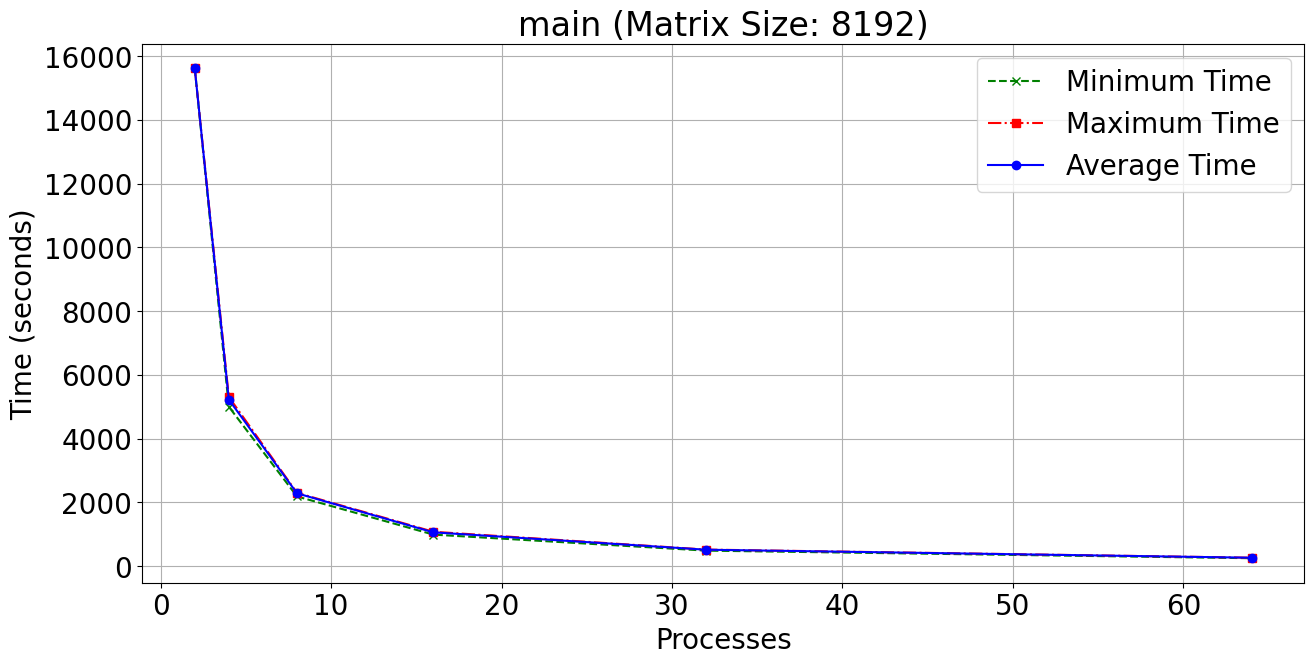

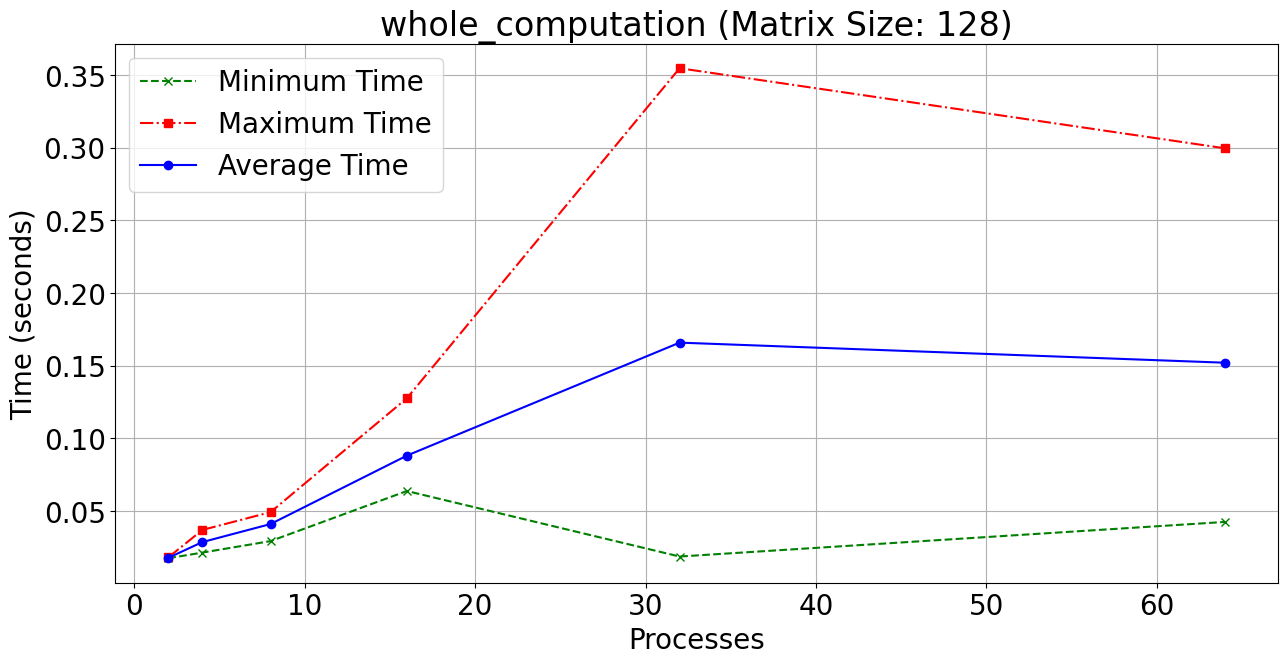

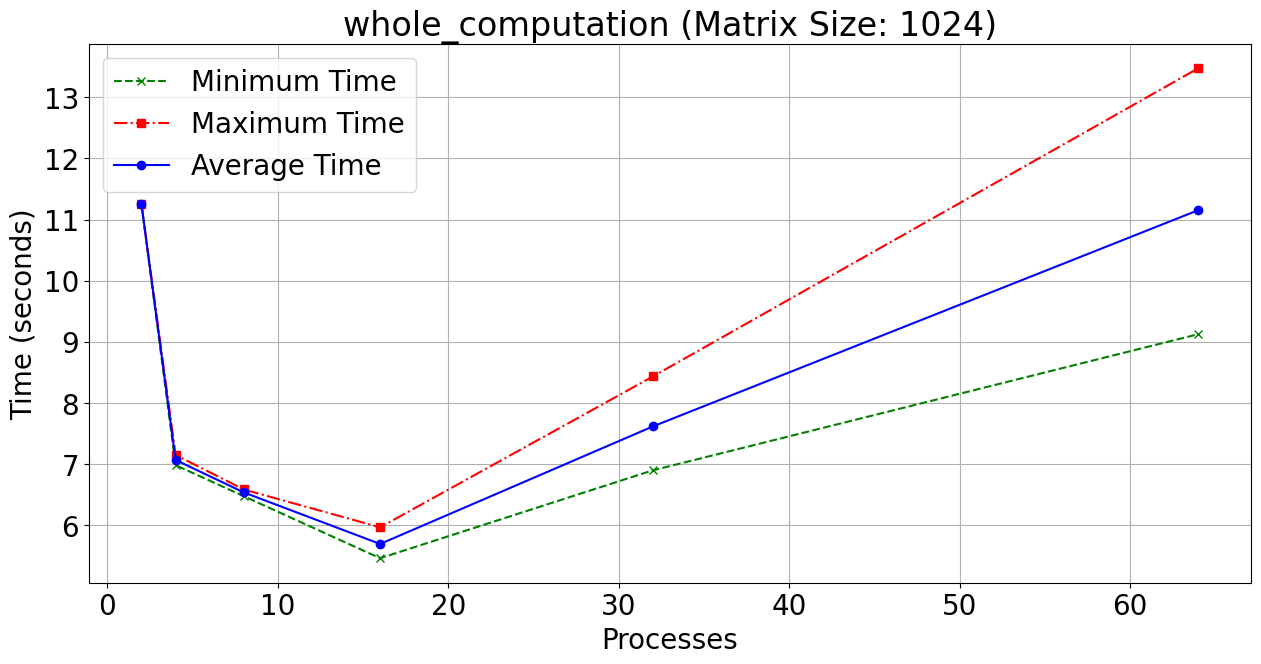

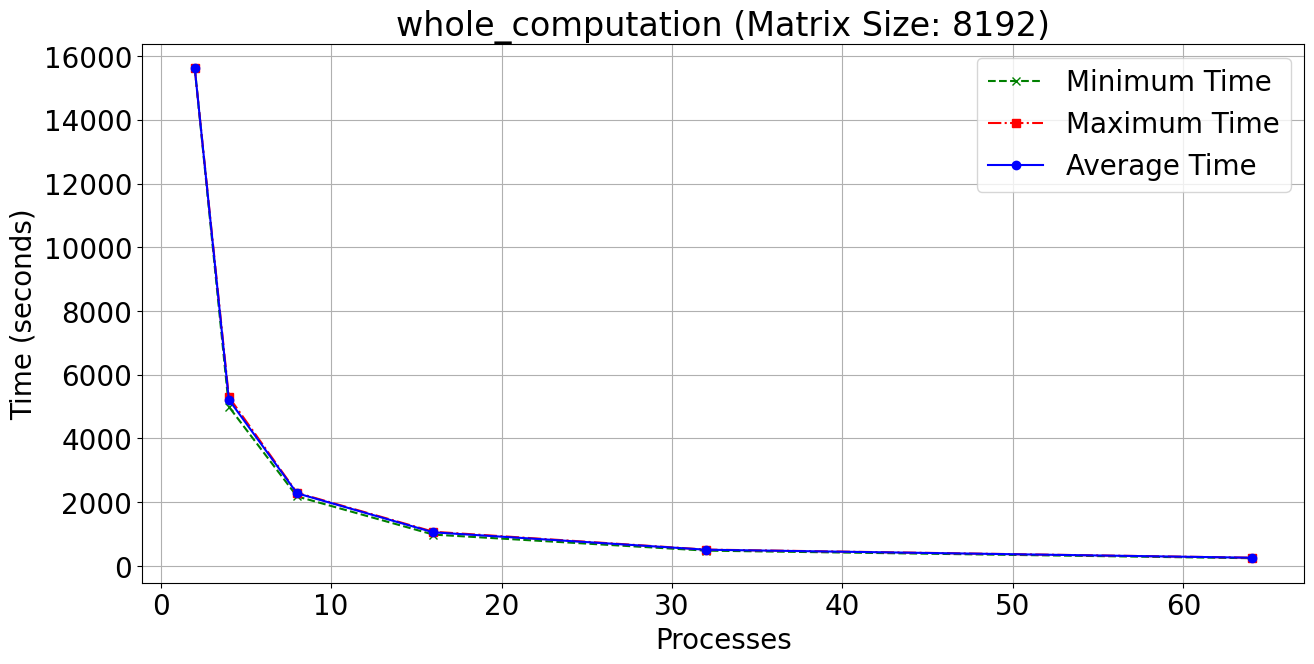

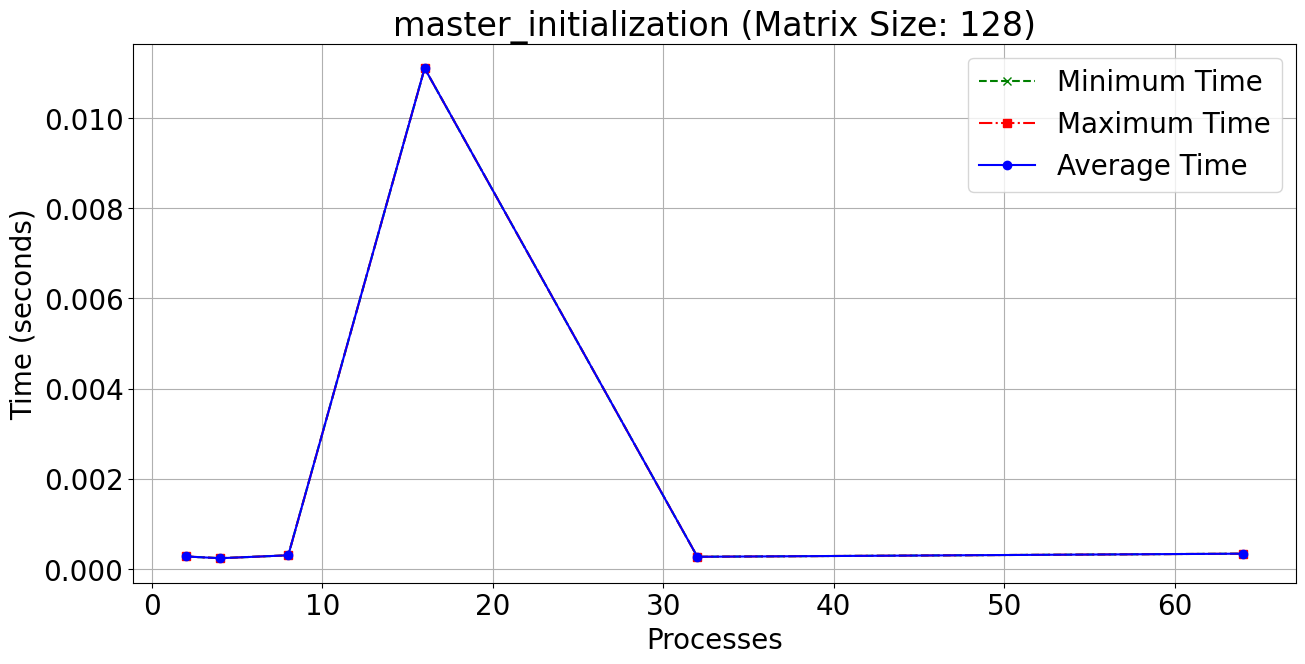

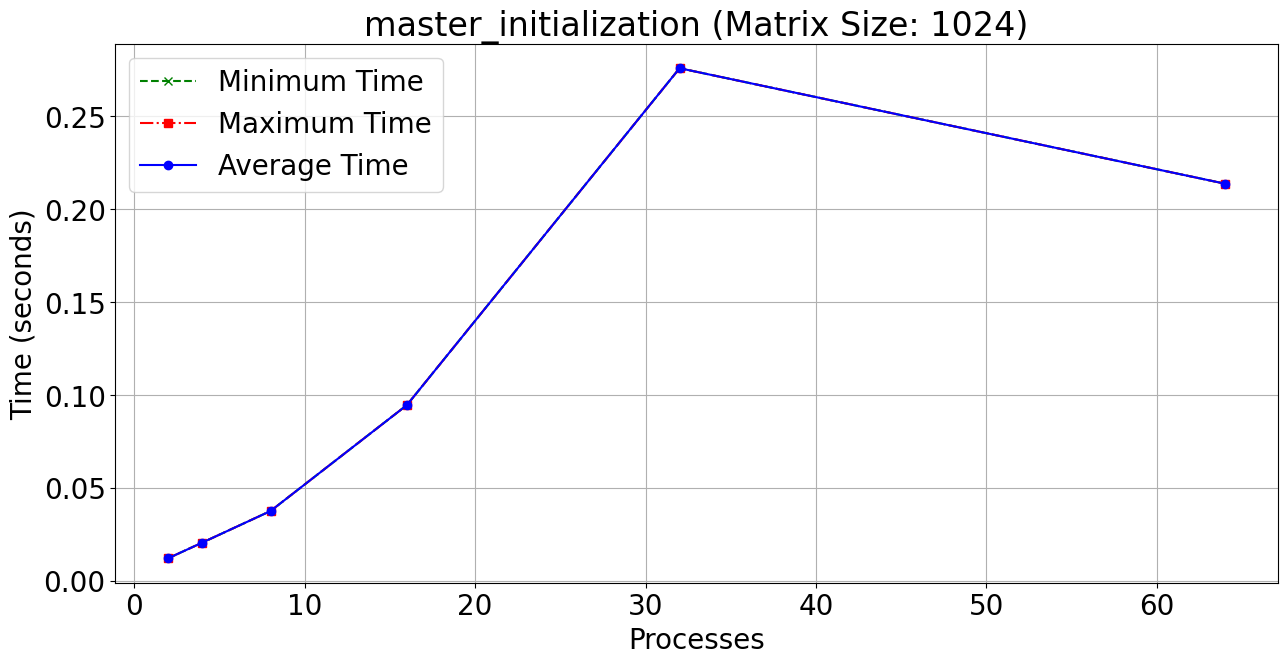

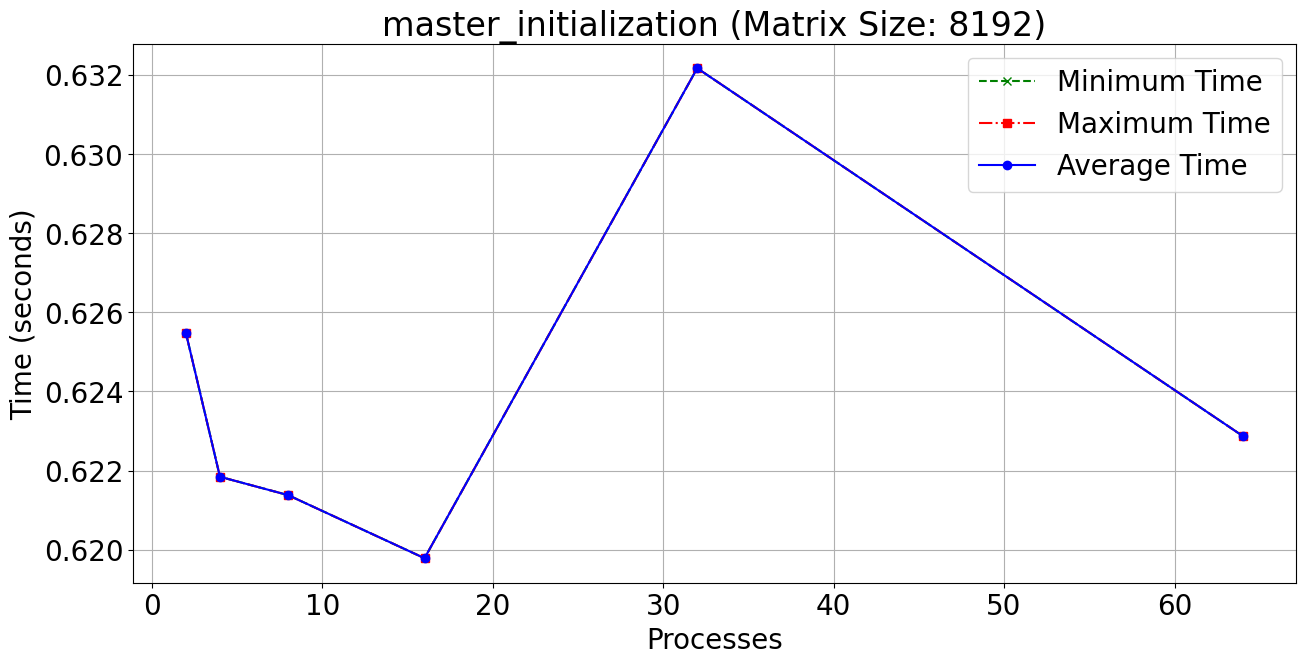

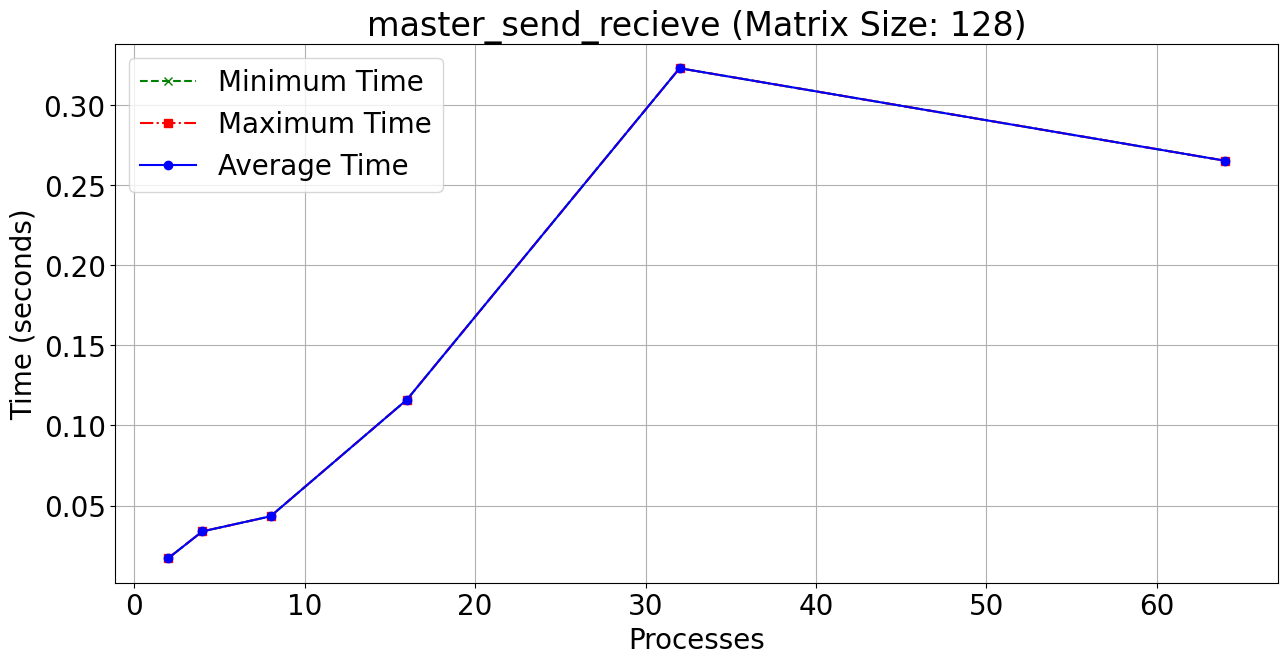

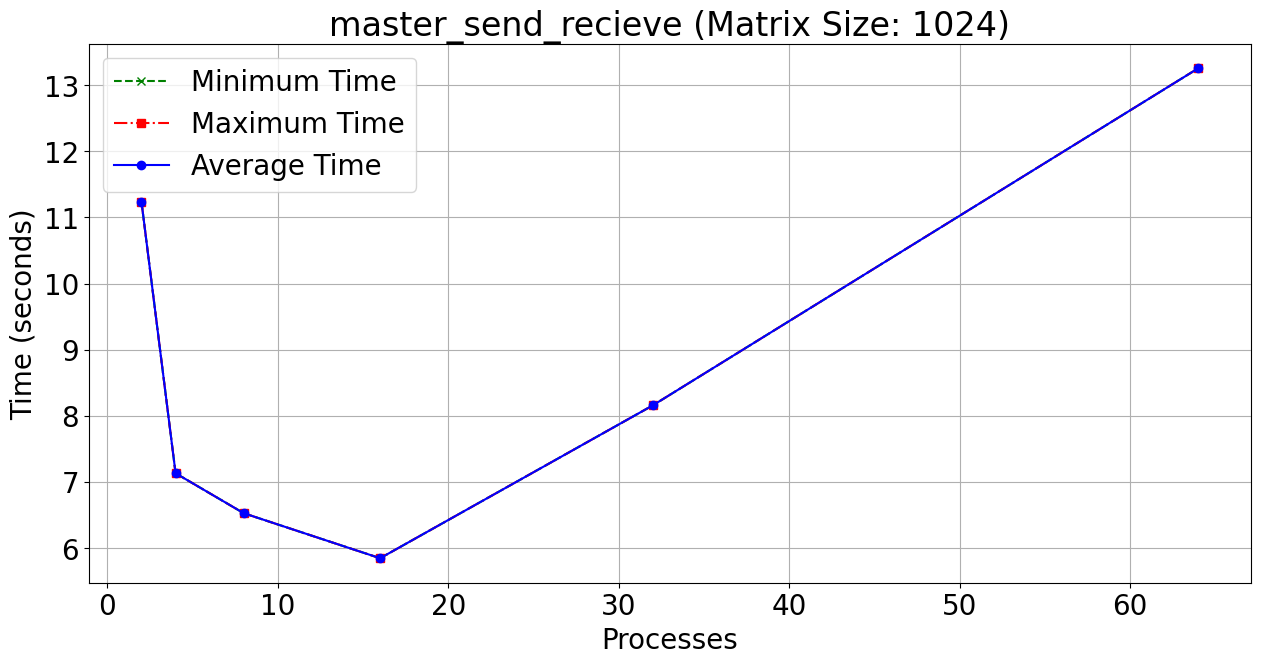

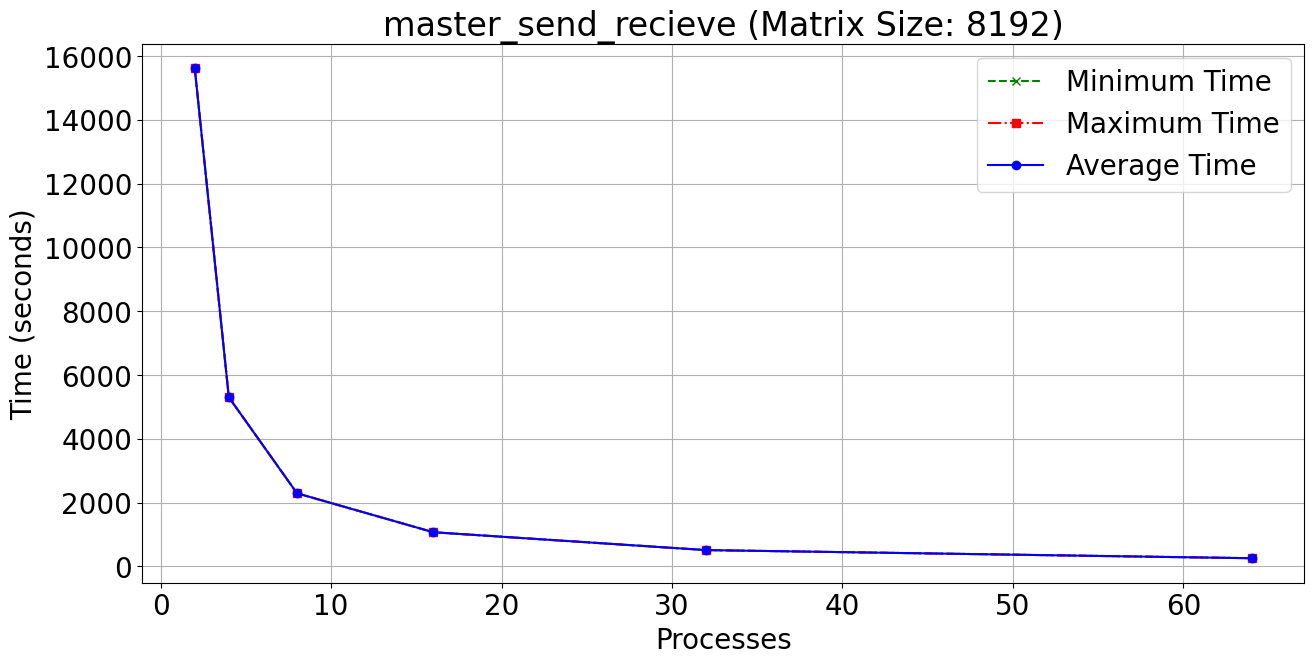

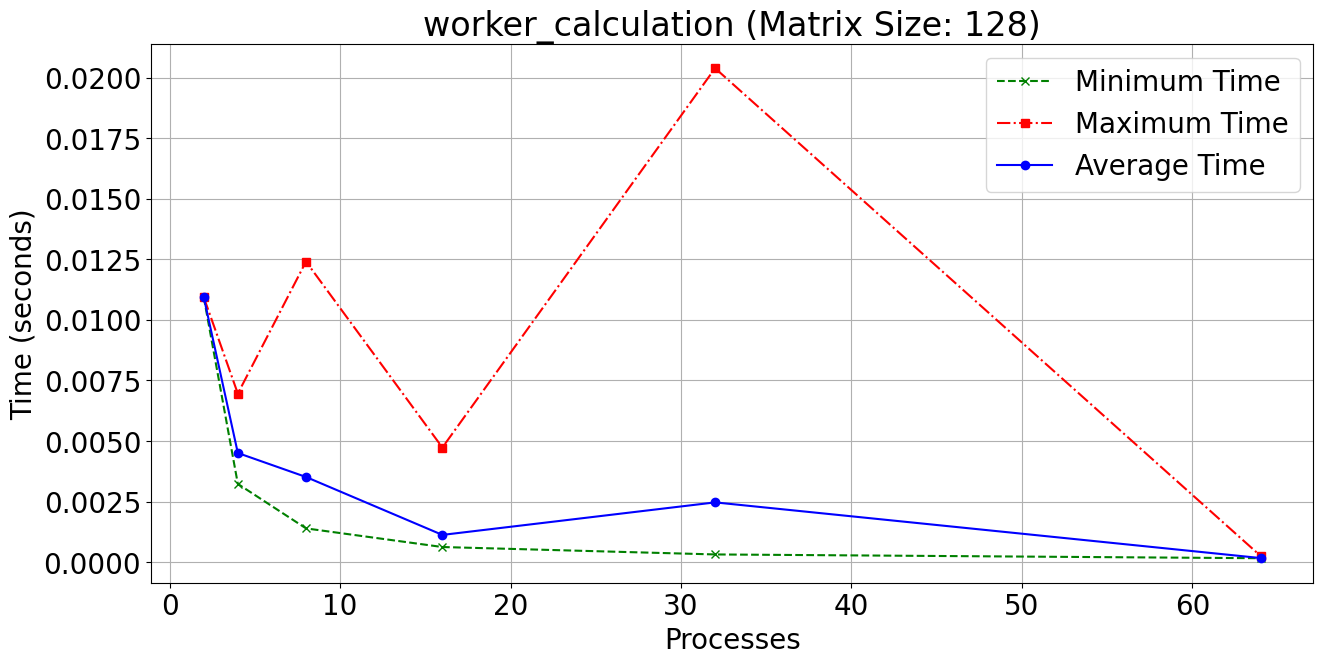

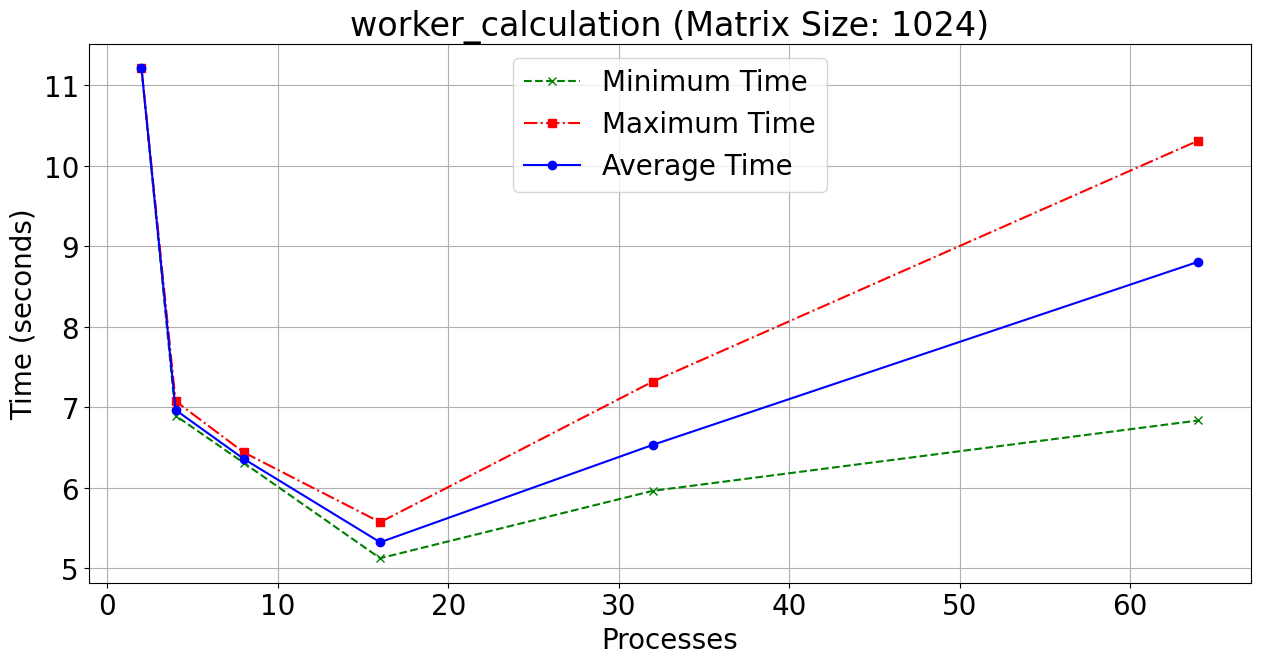

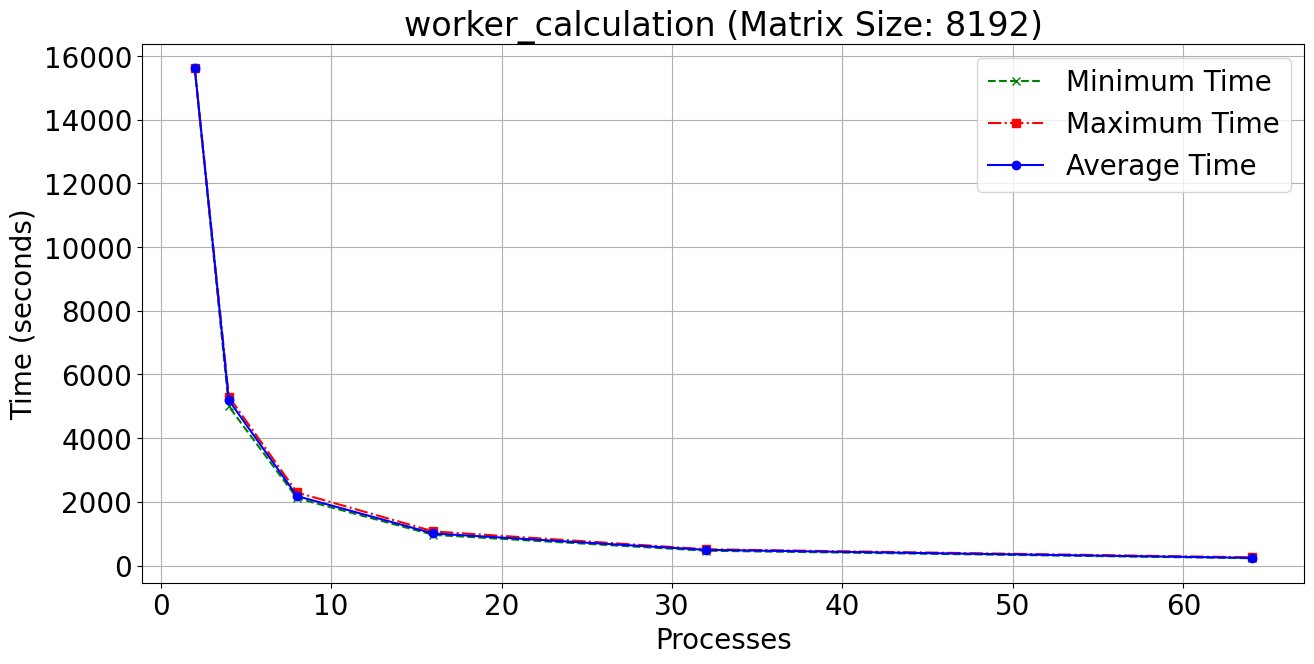

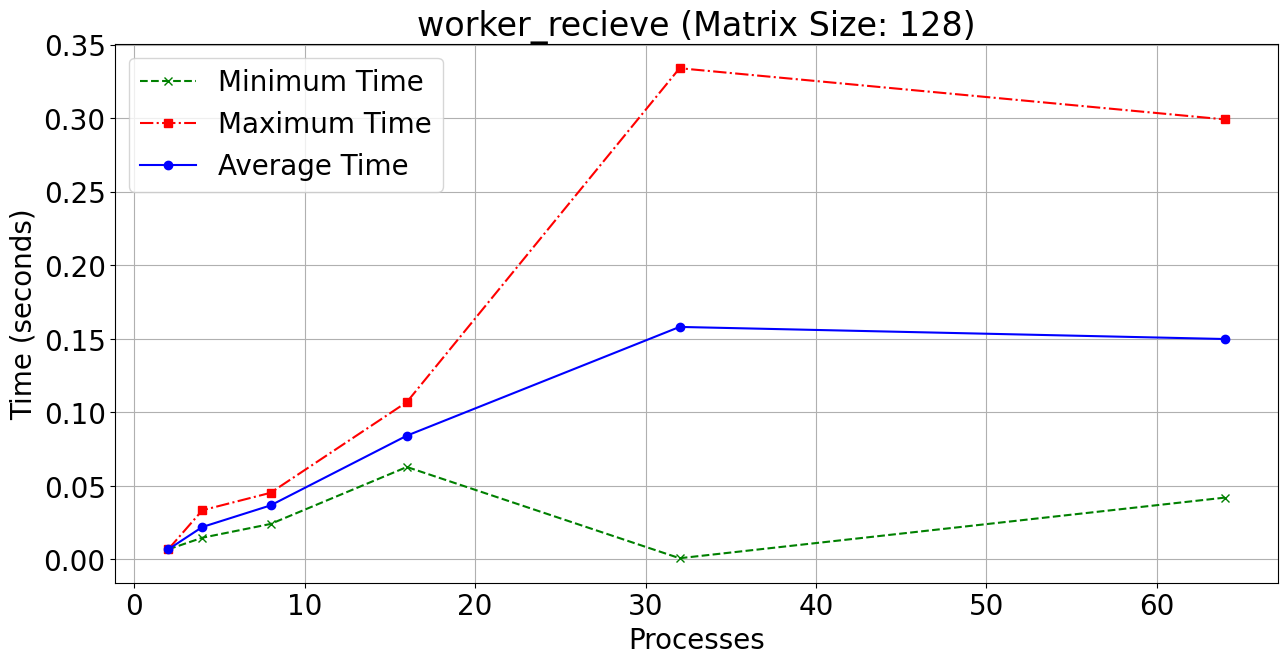

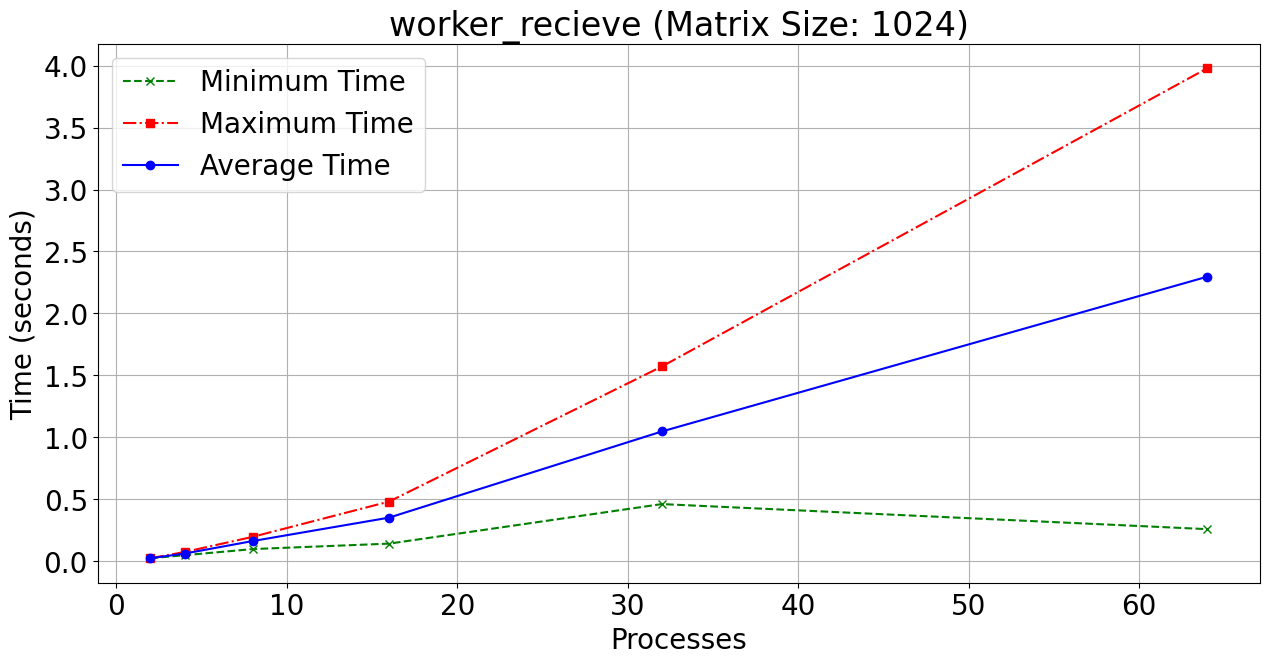

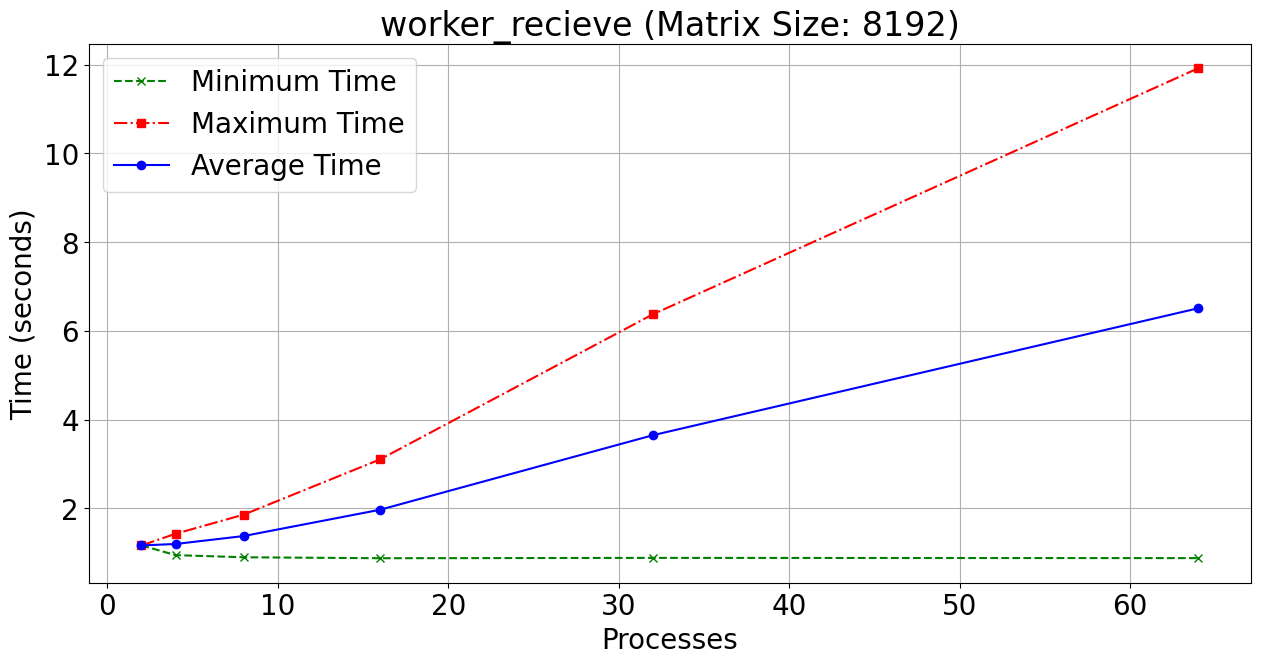

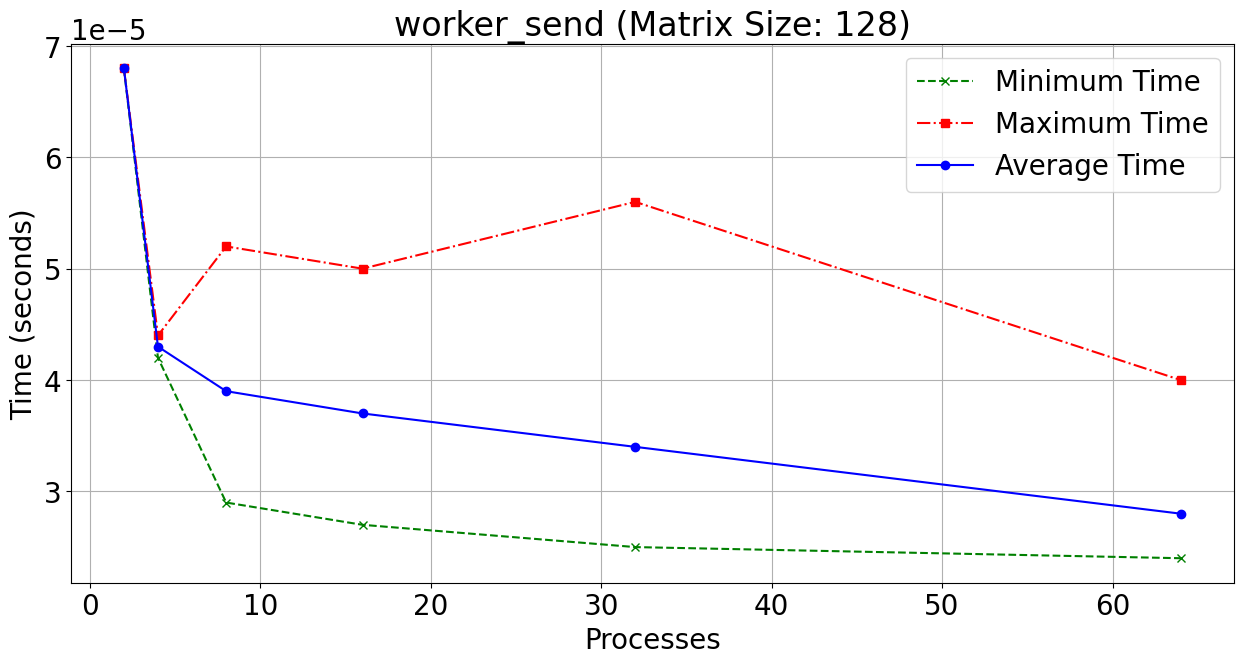

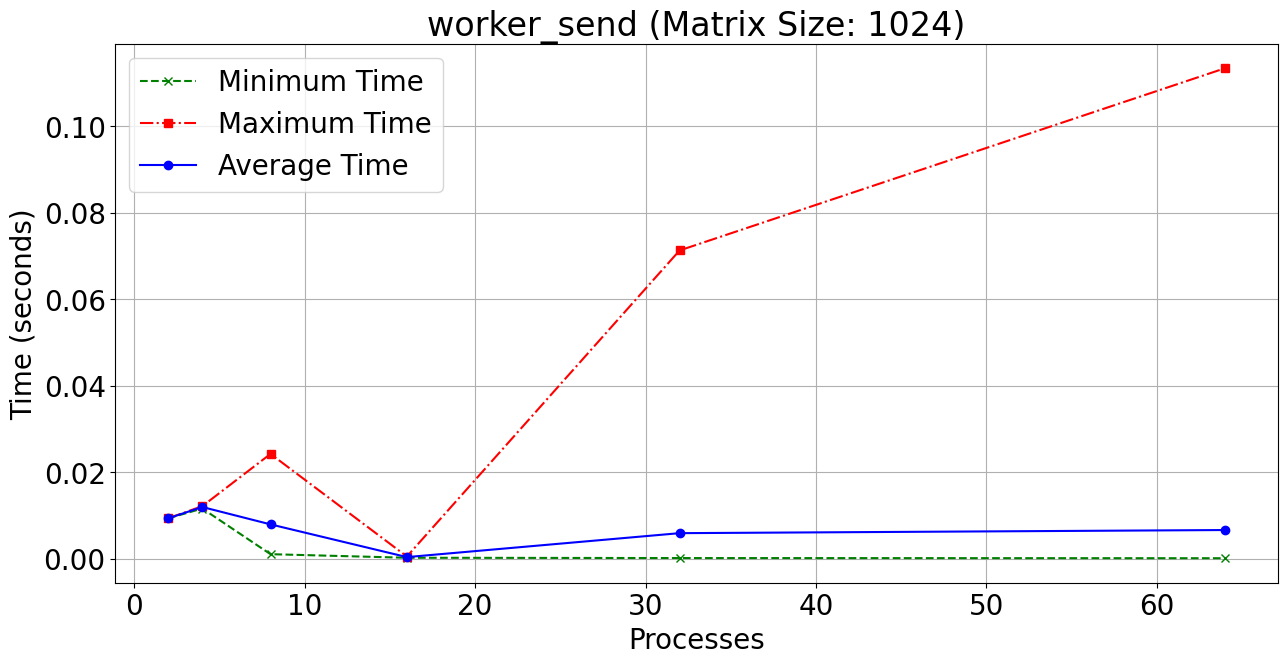

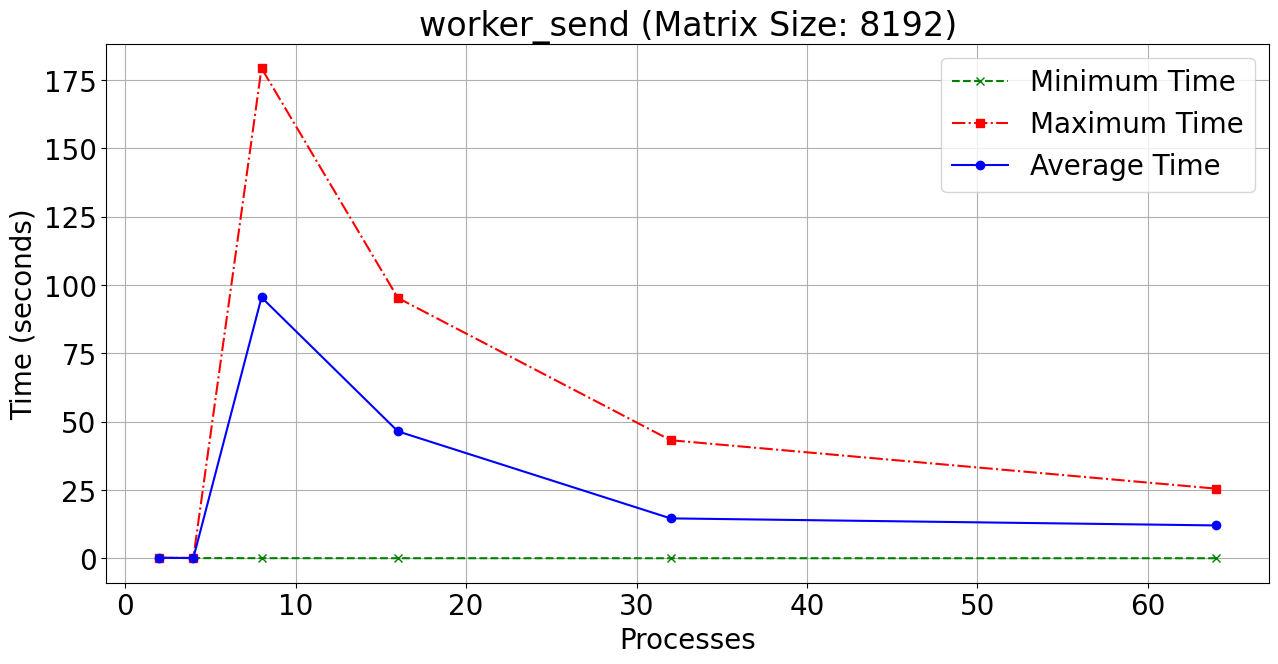

In [94]:
for node in tk.graph.traverse():
    # Get unique matrix sizes
    matrix_sizes = tk.dataframe.loc[node, "Total time"].index.get_level_values("matrix_size").unique()
    # if node.frame['name'] != 'master_send_recieve' and node.frame['name'] != 'master_initialization' and node.frame['name'] != 'whole_computation':
    # Loop through each matrix size and plot the data
    for matrix_size in matrix_sizes:
        # Filter the data for the current matrix size
        min_data = tk.dataframe.loc[node, "Min time/rank"].unstack(level="matrix_size")[matrix_size]
        max_data = tk.dataframe.loc[node, "Max time/rank"].unstack(level="matrix_size")[matrix_size]
        avg_data = tk.dataframe.loc[node, "Avg time/rank"].unstack(level="matrix_size")[matrix_size]

        # Create the plot for the current matrix size
        plot_times_pandas(
            p1=min_data,
            p2=max_data,
            p3=avg_data,
            title=f"{node.frame['name']} (Matrix Size: {matrix_size})",
            xlabel="Processes",
            ylabel="Time (seconds)"
        )
    # else:
    # # Loop through each matrix size and plot the data
    #     for matrix_size in matrix_sizes:
    #         # Filter the data for the current matrix size
    #         whole_comp_data = tk.dataframe.loc[node, "whole_computation"]
    #         init_data = tk.dataframe.loc[node, "master_initialization"]
    #         send_rcv_data = tk.dataframe.loc[node, "master_send_recieve"]

    #         # Create the plot for the current matrix size
    #         plot_times_pandas(
    #             p1=whole_comp_data,
    #             p2=init_data,
    #             p3=send_rcv_data,
    #             title=f"Master Process for Matrix Size: {matrix_size})",
    #             xlabel="Processes",
    #             ylabel="Time (seconds)"
    #         )


